In [22]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
numpy.random.seed(10)

In [23]:
all_df = pd.read_csv("weather.csv")

In [24]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [25]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [26]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [27]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [29]:
model = Sequential()

In [30]:
model.add(Dense(units=26*4,   input_dim=13,
                kernel_initializer='uniform', 
                activation='relu'))

In [31]:
model.add(Dense(units=26*3,   
                kernel_initializer='uniform', 
                activation='relu'))

In [32]:
model.add(Dense(units=26*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [33]:
model.add(Dense(units=26,   
                kernel_initializer='uniform', 
                activation='relu'))

In [34]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 104)               1456      
_________________________________________________________________
dense_7 (Dense)              (None, 78)                8190      
_________________________________________________________________
dense_8 (Dense)              (None, 52)                4108      
_________________________________________________________________
dense_9 (Dense)              (None, 26)                1378      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 27        
Total params: 15,159
Trainable params: 15,159
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [37]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 2s 26us/step - loss: 0.5532 - acc: 0.7816 - val_loss: 0.4104 - val_acc: 0.7774
Epoch 2/30
86104/86104 [==============================] - 2s 22us/step - loss: 0.3872 - acc: 0.8072 - val_loss: 0.3830 - val_acc: 0.8421
Epoch 3/30
86104/86104 [==============================] - 2s 23us/step - loss: 0.3570 - acc: 0.8526 - val_loss: 0.3582 - val_acc: 0.8429
Epoch 4/30
86104/86104 [==============================] - 2s 24us/step - loss: 0.3445 - acc: 0.8538 - val_loss: 0.3539 - val_acc: 0.8485
Epoch 5/30
86104/86104 [==============================] - 2s 24us/step - loss: 0.3414 - acc: 0.8551 - val_loss: 0.3533 - val_acc: 0.8464
Epoch 6/30
86104/86104 [==============================] - 2s 25us/step - loss: 0.3407 - acc: 0.8547 - val_loss: 0.3530 - val_acc: 0.8468
Epoch 7/30
86104/86104 [==============================] - 2s 25us/step - loss: 0.3394 - acc: 0.8554 - val_loss: 0.3514 - val_acc:

In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

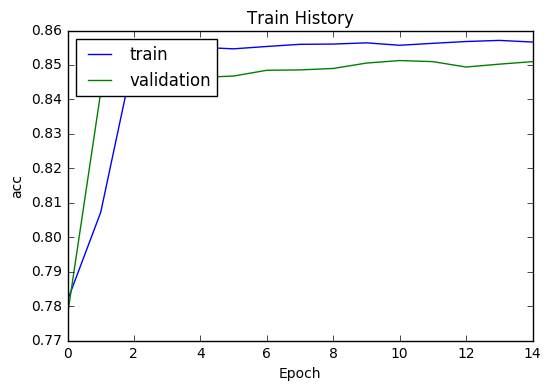

In [39]:
show_train_history(train_history,'acc','val_acc')

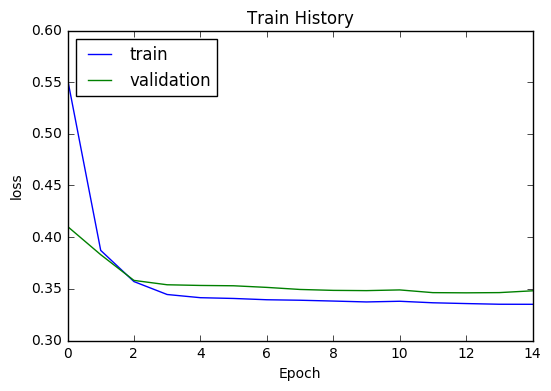

In [40]:
show_train_history(train_history,'loss','val_loss')

In [41]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 1s 32us/step


In [42]:
scores[1]

0.854795551467514